In [1]:
import pandas as pd
from sqlalchemy import create_engine
import os
from dotenv import load_dotenv
import matplotlib.pyplot as plt 
import seaborn as sns

load_dotenv()

DB_URL = os.getenv("DATABASE_URL")

engine = create_engine(DB_URL)


df = pd.read_sql("SELECT * FROM weather_data", engine)
df['timestamp'] = df['timestamp'].dt.tz_convert('Asia/Kolkata')
df.head()

,id,city,timestamp,temperature,humidity,wind_speed,pm10,pm2_5,nitrogen_dioxide,ozone
0,1,Ahmedabad,2025-11-16 00:16:38.567400+05:30,20.2,46.0,3.500000,35.85,34.75,26.85,72.0
1,2,Bengaluru,2025-11-16 00:16:38.376559+05:30,20.2,88.0,2.888889,44.85,43.15,36.95,53.0
2,3,Bhopal,2025-11-16 00:16:38.737303+05:30,18.0,28.0,2.000000,56.95,50.35,20.45,76.0
3,4,Chennai,2025-11-16 00:16:38.355079+05:30,27.0,84.0,5.611111,59.25,50.05,8.05,113.0
4,5,Dehradun,2025-11-16 00:16:38.785387+05:30,11.4,55.0,2.194444,53.05,51.85,34.55,105.0


In [2]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['date'] = df['timestamp'].dt.date
df['hour'] = df['timestamp'].dt.hour
today = df['date'].max()   # latest date in my DB
df_today = df[df['date'] == today]
df_today

,id,city,timestamp,temperature,humidity,wind_speed,pm10,pm2_5,nitrogen_dioxide,ozone,date,hour
990,991,Ahmedabad,2025-11-19 00:22:29.450159+05:30,19.1,52.0,2.805556,55.95,54.45,35.35,64.0,2025-11-19,0
991,992,Bengaluru,2025-11-19 00:22:29.258640+05:30,20.2,88.0,3.805556,16.75,16.75,22.25,73.0,2025-11-19,0
992,993,Bhopal,2025-11-19 00:22:29.659153+05:30,13.2,72.0,2.000000,69.75,67.65,17.15,92.0,2025-11-19,0
993,994,Chennai,2025-11-19 00:22:29.255975+05:30,24.3,94.0,4.305556,20.45,16.75,8.75,83.0,2025-11-19,0
994,995,Dehradun,2025-11-19 00:22:29.696376+05:30,12.6,62.0,2.000000,50.95,50.55,39.55,85.0,2025-11-19,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1090,1091,Lucknow,2025-11-19 09:03:15.522606+05:30,19.1,78.0,1.194444,110.75,108.85,24.45,49.0,2025-11-19,9
1091,1092,Mumbai,2025-11-19 09:03:15.269016+05:30,24.2,44.0,4.111111,57.85,56.35,31.65,57.0,2025-11-19,9
1092,1093,Patna,2025-11-19 09:03:15.505822+05:30,22.1,65.0,1.000000,134.05,129.85,28.85,42.0,2025-11-19,9
1093,1094,Pune,2025-11-19 09:03:15.455542+05:30,20.5,40.0,2.805556,53.45,50.55,9.45,85.0,2025-11-19,9


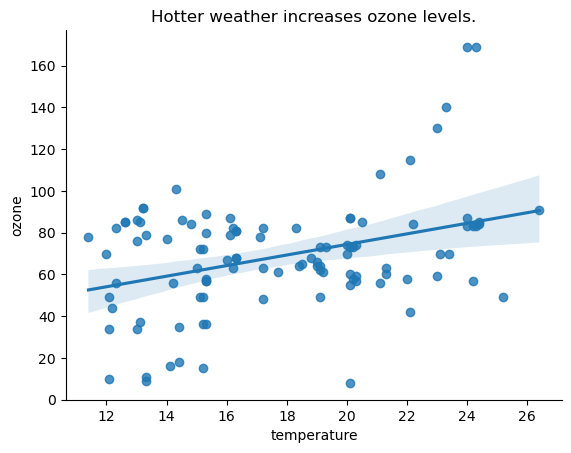

In [3]:
sns.regplot(data=df_today,x='temperature', y='ozone')
plt.title("Hotter weather increases ozone levels.")
sns.despine()
plt.show()

## Points to remember

    1.Line go up -- Positive relatioship (as temp increases, ozone increse)
    2.Line going down -- negative relationship (as temp increses, ozone decreases)
    3.Flat line -- No linear relationship (temp doesn't affect ozone much)

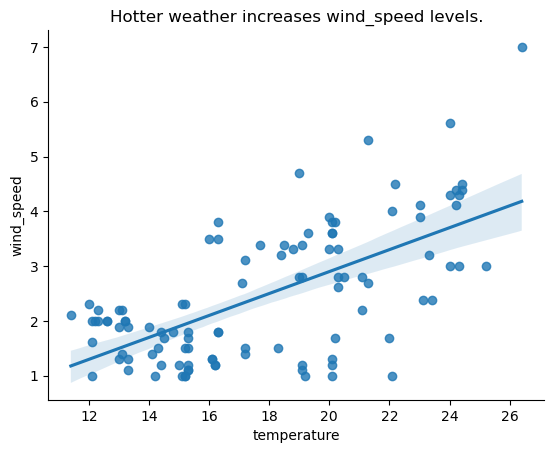

In [4]:
sns.regplot(data=df_today,x='temperature', y='wind_speed')
plt.title("Hotter weather increases wind_speed levels.")
sns.despine()
plt.show()

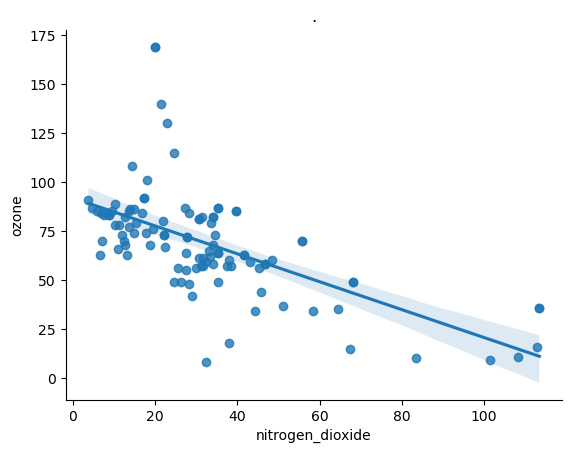

In [5]:
sns.regplot(data=df_today,x='nitrogen_dioxide', y='ozone')
plt.title(".")
sns.despine()
plt.show()

## Points to remember

    1.Line go up -- Positive relatioship 
    2.Line going down -- negative relationship
    3.Flat line -- No linear relationship